In [146]:
from scipy import stats
import random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [147]:
random.seed(0)

#### 1. 예제 데이터 생성

In [148]:
z = np.random.binomial(1,0.5,3000)

In [149]:
n1 = (z==0).sum()
n2 = (z==1).sum()
print(n1,n2)

1484 1516


In [150]:
mix = np.concatenate([np.random.normal(0,1,n2),np.random.normal(4,1,n1)])

#### 2. 데이터 분포 확인

(array([  9.,  26.,  67., 152., 238., 303., 296., 225., 125.,  78., 107.,
        180., 282., 298., 286., 201.,  76.,  33.,  12.,   6.]),
 array([-3.11954434, -2.59450467, -2.06946499, -1.54442532, -1.01938565,
        -0.49434598,  0.0306937 ,  0.55573337,  1.08077304,  1.60581271,
         2.13085238,  2.65589206,  3.18093173,  3.7059714 ,  4.23101107,
         4.75605075,  5.28109042,  5.80613009,  6.33116976,  6.85620943,
         7.38124911]),
 <a list of 20 Patch objects>)

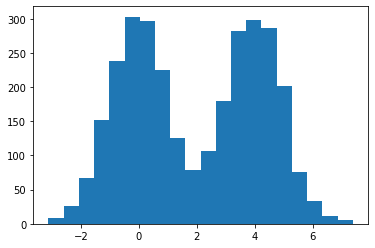

In [151]:
plt.hist(mix,bins= 20)

#### 3. EM알고리즘을 위한 초기값 등 필요값 설정

In [152]:
ll_new = 1; ll_old = 0
n = len(z)
z_new = np.random.binomial(1,0.2,3000)
pi = 0.8; mu1 = 2; mu2 = 5; sig1 = 2; sig2= 2
iter = 1
criterion = 1e-15

#### 4. EM 알고리즘 시행

In [156]:
while (ll_new-ll_old > criterion):
    z_old = z_new
    pi_old = pi
    mu1_old = mu1; mu2_old = mu2
    sig1_old = sig1; sig2_old = sig2
    ll_old = np.sum(z_old*(np.log(pi_old)+np.log(stats.norm(mu1_old,sig1_old).pdf(mix))))+np.sum((1-z_old)*(np.log(1-pi_old)+np.log(stats.norm(mu2_old,sig2_old).pdf(mix))))
    
    for i in range(len(z)):
        ber_p = pi_old*stats.norm(mu1_old,sig1_old).pdf(mix[i])/(pi_old*stats.norm(mu1_old,sig1_old).pdf(mix[i])+ (1-pi_old)*stats.norm(mu2_old,sig2_old).pdf(mix[i]))    
        z[i] = np.random.binomial(1,p=ber_p,size=1)
    z_new = z    
    
    pi = np.sum(z_new)/n    
    mu1 = np.sum(z_new*mix)/np.sum(z_new)
    mu2 = np.sum((1-z_new)*mix)/np.sum(1-z_new)
    sig1 = np.sqrt(np.sum(z_new*(mix-mu1_old)*(mix-mu1_old))/np.sum(z_new))
    sig2 = np.sqrt(np.sum((1-z_new)*(mix-mu2_old)*(mix-mu2_old))/np.sum((1-z_new)))    
    ll_new = np.sum(z_new*(np.log(pi)+np.log(stats.norm(mu1,sig1).pdf(mix))))+np.sum((1-z_new)*(np.log(1-pi)+np.log(stats.norm(mu2,sig2).pdf(mix))))

    iter = iter + 1            

print("Algorithm converged, in :",iter,"iterations \n")
print("Estimated pi : ", round(pi,3), "\n")
print("Estimated mu1 : ", round(mu1,3), "\n")
print("Estimated mu2 : ", round(mu2,3), "\n")
print("Estimated sig1 : ", round(sig1,3), "\n")
print("Estimated sig2 : ", round(sig2,3), "\n")    

Algorithm converged, in : 21 iterations 

Estimated pi :  0.509 

Estimated mu1 :  -0.017 

Estimated mu2 :  4.028 

Estimated sig1 :  1.028 

Estimated sig2 :  0.967 



- EM 알고리즘을 통해 기존 우리가 데이터를 만들었을 때의 $\pi$ = 0.5, $\mu_{1}$ = 0, $\mu_{2}$ =4, $\sigma_{1}$ =1, $\sigma_{2}$ =1 값의 근방의 값으로 값이 추정되는 것을 확인할 수 있다.